#Hw2
B06705034 資管三 吳禹辰

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.linear_model import Lasso

In [5]:
test = pd.read_csv("./data/df1_test1.csv")
testy = pd.read_csv("./data/df1_test1y.csv")
train = pd.read_csv("./data/df1_train.csv")

In [6]:
testy = np.array(testy)

In [7]:
trainX = train.iloc[:,1:44]
trainY = train.iloc[:,0]

##Q1
Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset. 

In [23]:
train

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,...,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,...,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,...,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,453,107907,0,4390,4607,2862,1,63,26,0,...,0,0,0,0,0,1,0,0,0,0
396,1038,126141,0,20896,19738,13656,103,469,33,0,...,0,0,0,0,0,0,0,1,0,0
397,3682,126424,0,18320,25584,14920,36,98,14,0,...,0,0,0,0,0,0,0,0,1,0
398,1330,129600,1,40336,27771,14848,4,104,10,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
train.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


從指標上來看training set，我們要預測的變數life_post_consumer變異相當大，標準差大於平均數。   
其他變數的標準差也幾乎都大於平均數，顯示這份data變異很大。   
此外，除了comp_page_like外，許多變數的平均數都大於中位數許多，顯示其為右尾分佈

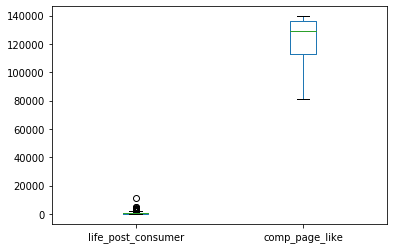

In [56]:
train.iloc[:,0:2].plot.box()

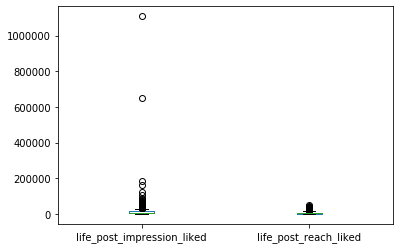

In [71]:
train.iloc[:,4:6].plot.box()

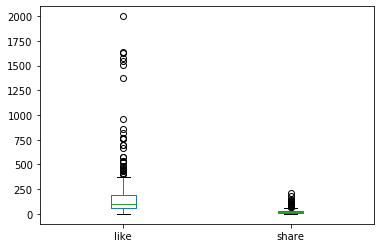

In [67]:
train.iloc[:,7:9].plot.box()

從Box plot來看，除了comp_page_like外，其他的非binary變數都有相當多的outlier 

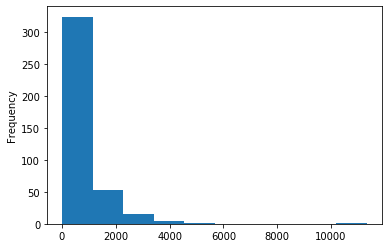

In [76]:
train.iloc[:,0].plot.hist()

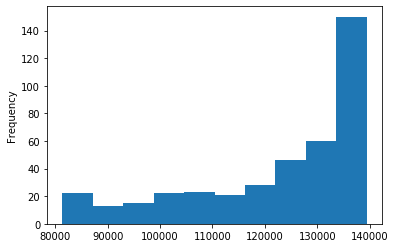

In [77]:
train.iloc[:,1].plot.hist()

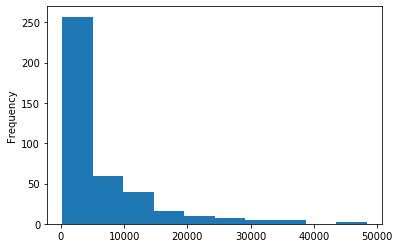

In [79]:
train.iloc[:,5].plot.hist()

從histogram可以看到除了comp_page_like外，幾乎都為右尾分佈 

In [32]:
test.describe()

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,123098.70000,0.400000,17675.540000,14777.600000,7120.060000,8.500000,210.060000,29.540000,0.080000,0.120000,...,0.020000,0.040000,0.0,0.040000,0.040000,0.14000,0.080000,0.100000,0.100000,0.040000
std,16463.28812,0.494872,31889.687096,19024.467247,7823.016041,11.294301,249.013516,24.742107,0.274048,0.328261,...,0.141421,0.197949,0.0,0.197949,0.197949,0.35051,0.274048,0.303046,0.303046,0.197949
min,81370.00000,0.000000,1080.000000,1614.000000,934.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,111972.00000,0.000000,3765.500000,4769.750000,2666.500000,2.000000,71.250000,10.750000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,130195.50000,0.000000,5779.000000,6625.500000,3964.000000,4.000000,143.500000,26.500000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,135938.00000,1.000000,14584.000000,16273.750000,8357.000000,10.000000,221.250000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,139441.00000,1.000000,158208.000000,92512.000000,39776.000000,60.000000,1155.000000,102.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


test set也有變異數大和右尾的情形。 

##Q2
Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [39]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [8]:
result = np.sum(trainY) / len(trainY)
rmse1 = np.sqrt(np.sum((testy-result)**2)/len(testy))
print(rmse1)

928.8095109332162


In [9]:
print("Prediction:")
print(result)
print("True values:")
print(testy[0:20])

Prediction:
810.34
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q3
Construct a prediction model using the setting of Case 2A. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data? 

In [42]:
lm = LinearRegression()
lm.fit(trainX, trainY)
result = lm.predict(test)

###RMSE:

In [71]:
testy = np.reshape(testy, (50,))
rmse1 = np.sqrt(np.sum((testy-result)**2)/len(testy-result))
rmse2 = rmse(result, testy)
print(rmse1)
print(rmse(result, testy))

print(((testy-result)**2).sum()/len(testy-result))
print(((testy - result) ** 2).shape)
print(np.reshape(testy, (50,)))

692.2891271362014
692.2891271362014
479264.23555100366
(50,)
[1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633    9  705  991  374  944  284  460  642
  984 1877  333  574   86  483 1288  727  632  783   37  306 1016  406
  381 1106  503 2531  620  482 1103  522]


In [14]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q4
Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data? 

In [33]:
trainY_demean = trainY - np.mean(trainY)

lm = LinearRegression()
lm.fit(trainX, trainY_demean)
result = lm.predict(test) + np.mean(trainY)

###RMSE:

In [36]:
rmse3 = np.sqrt(((result - testy) ** 2).mean())
print(rmse3)

1300.8774643731535


RMSE較沒de-mean時降低了一點點可忽略的值

In [191]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q5
Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [192]:
trainX_std = (trainX - np.mean(trainX)) / np.std(trainX)
test_std = (test - np.mean(trainX)) / np.std(trainX)

In [193]:
lm = LinearRegression()
lm.fit(trainX_std, trainY_demean)
result = lm.predict(test_std) + np.mean(trainY)

###RMSE:

In [194]:
rmse4 = np.sqrt(np.sum((testy-result)**2)/len(testy))
print(rmse4)

9198.59276551848


In [ ]:
RMSE相差不大，可忽略區別

In [183]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q6
Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient ( 𝛼 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  𝛼 . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  𝛼 ? 

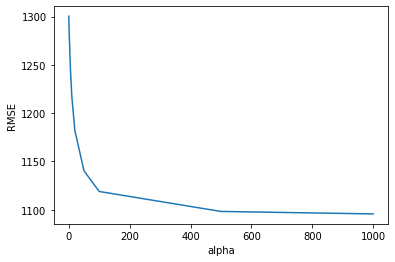

In [37]:
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmses = []
for a in alphas:
    rm = Ridge(alpha = a)
    rm.fit(trainX, trainY)
    result = rm.predict(test)
    rmse = np.sqrt(((result - testy) ** 2).mean())
    rmses.append(rmse)

plt.figure()
plt.plot(alphas,rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

###RMSE:

In [38]:
rmses

[1300.2907630940015,
 1298.0168411372706,
 1286.827231024771,
 1248.113864794346,
 1217.2358317954508,
 1181.8268024028894,
 1140.2913636676356,
 1118.939012313636,
 1098.2725426784114,
 1095.7158358613274]

RMSE隨著alpha值成負相關。 

In [209]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[1451.97059843  313.54522225 1188.95113326  287.33169687  538.24828516
  880.44626656  683.26801912  381.96503031  678.78538039  744.81355457
  515.79278104  614.32808654  867.5779907   725.27582617  563.7024028
  558.17410459  775.03613105 1624.46089441 3204.12845043 2783.13682155]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q7
Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient ( 𝛼 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  𝛼 . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  𝛼 ? 

In [256]:
trainX_std2 = pd.concat([trainX_std.iloc[:,0:1],trainX.iloc[:,1] , trainX_std.iloc[:,2:8], trainX.iloc[:,8:44]], axis = 1) 
test_std2 = pd.concat([test_std.iloc[:,0:1],test.iloc[:,1] , test_std.iloc[:,2:8], test.iloc[:,8:44]], axis = 1) 

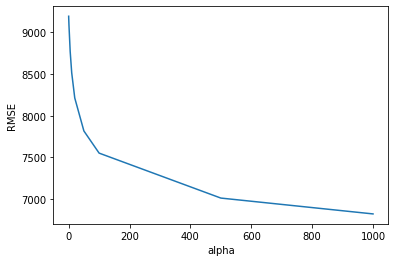

In [258]:
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmses = []
for a in alphas:
    rm = Ridge(alpha = a)
    rm.fit(trainX_std2, trainY_demean)
    result = rm.predict(test_std2) + np.mean(trainY)
    rmse = np.sqrt(np.sum((testy-result)**2)/len(testy))
    rmses.append(rmse)

plt.figure()
plt.plot(alphas,rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

###RMSE:

In [259]:
rmses

[9194.232364997997,
 9177.003649824106,
 9085.942745068076,
 8770.605797000078,
 8515.826149829369,
 8213.625213100982,
 7817.78827204799,
 7551.921415336162,
 7012.387811920731,
 6822.292415097878]

RMSE一樣隨著alpha值變大而變小，而且比沒做標準化及de-mean更好。 

In [260]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[1187.13848209  584.37027272  978.97174173  565.79245002  701.39980669
  833.20060582  718.73594372  639.71053078  743.29122681  777.44106119
  716.10085136  697.6712398   800.97507389  752.91595525  671.35418989
  692.69812625  805.56710285 1406.08035486 1732.62194118 1501.79101826]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


###Q8
Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient ( 𝛼 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  𝛼 . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  𝛼 ? 

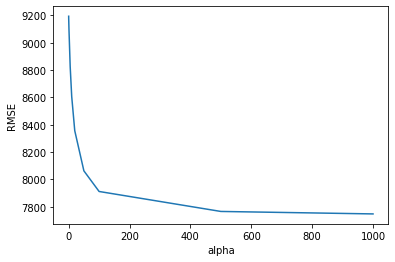

In [261]:
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmses = []
for a in alphas:
    rm = Ridge(alpha = a)
    rm.fit(trainX, trainY_demean)
    result = rm.predict(test) + np.mean(trainY)
    rmse = np.sqrt(np.sum((testy-result)**2)/len(testy))
    rmses.append(rmse)

plt.figure()
plt.plot(alphas,rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

###RMSE: 

In [262]:
rmses

[9194.44416097999,
 9178.365104625054,
 9099.242612731236,
 8825.497774890317,
 8607.15710965811,
 8356.77746167097,
 8063.077557778406,
 7912.093633411499,
 7765.959625188964,
 7747.880977910306]

與Q6相差無幾，顯示de-mean效果不大，但標準化效果則明顯。 

In [263]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[1451.97059843  313.54522225 1188.95113326  287.33169687  538.24828516
  880.44626656  683.26801912  381.96503031  678.78538039  744.81355457
  515.79278104  614.32808654  867.5779907   725.27582617  563.7024028
  558.17410459  775.03613105 1624.46089441 3204.12845043 2783.13682155]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


###Q9
Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient ( 𝛼 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  𝛼 . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  𝛼 ? 

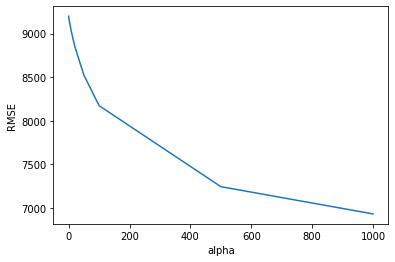

In [264]:
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmses = []
for a in alphas:
    rm = Ridge(alpha = a)
    rm.fit(trainX_std, trainY_demean)
    result = rm.predict(test_std) + np.mean(trainY)
    rmse = np.sqrt(np.sum((testy-result)**2)/len(testy))
    rmses.append(rmse)

plt.figure()
plt.plot(alphas,rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

###RMSE:

In [265]:
rmses

[9198.006958225247,
 9193.286249700563,
 9166.683585703593,
 9090.114775162776,
 9003.853490683307,
 8853.892176363386,
 8523.621008626926,
 8173.803391372798,
 7245.925763371817,
 6933.894945258497]

效果沒有de-mean前好

In [266]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[1053.0292433   478.19671262 1337.34654924  421.46083729  738.60575958
  766.30387379  589.84615758  679.21841099  657.51391406  726.70819608
  695.27081886  651.84952048  802.72357194  696.12019256  586.45466852
  740.98488133 1161.71897625 1781.42087403 1838.77732441 1647.76719224]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


###Q10
Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient ( 𝛼 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  𝛼 . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  𝛼 ? 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14864497, tolerance: 32249.892376
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.675997615, tolerance: 32249.892376
  positive)


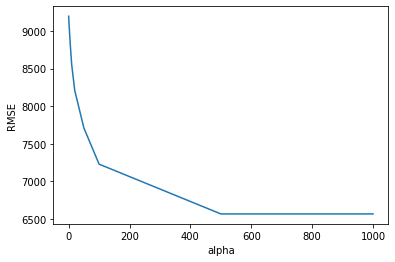

In [281]:
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmses = []
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(trainX_std2, trainY_demean)
    result = lasso.predict(test_std2) + np.mean(trainY)
    rmse = np.sqrt(np.sum((testy-result)**2)/len(testy))
    rmses.append(rmse)

plt.figure()
plt.plot(alphas,rmses)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

###RMSE:

In [282]:
rmses

[9197.184279335657,
 9188.287903051742,
 9111.748458263495,
 8837.839840067312,
 8550.654252061193,
 8208.7692015008,
 7710.701124085799,
 7229.483398632608,
 6567.675036114378,
 6567.675036114378]

RMSE一樣隨著alpha上升而下降，且最優者優於Ridge regression

In [283]:
print("Predictions:")
print(result[0:20])
print("True values:")
print(testy[0:20])

Predictions:
[810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34]
True values:
[[1183]
 [ 189]
 [2327]
 [  76]
 [ 354]
 [ 713]
 [ 204]
 [ 288]
 [ 555]
 [ 586]
 [ 446]
 [ 884]
 [ 524]
 [ 672]
 [  23]
 [ 570]
 [1361]
 [5934]
 [2319]
 [1633]]


##Q11
Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?  
RMSE分別為： 

In [300]:
print(rmse1)
print(rmse2)
print(rmse3)
print(rmse4)
print([7747.880977910307, 6822.292415097878, 7747.880977910306, 6933.894945258497, 6567.675036114378])

928.8095109332162
9198.592765511561
9198.592765510182
9198.59276551848
[7747.880977910307, 6822.292415097878, 7747.880977910306, 6933.894945258497, 6567.675036114378]


發現這組資料似乎平均數是最適合描述的方式，ymean和lasso在很大alpha值的情況下預測的結果非常接近，RMSE也較低。  
在這份資料上的表現，ymean > lasso > ridge > ols 
對於ols而言，preprocess似乎影響不大，而對於ridge而言，有沒有de-mean影響不大，但標準化影響則明顯，如果能排除binary variable，只對continue variable做的話效果更好。 